<center>Заметка 3. Классификация на примере распознавания рукописных цифр.</center>
<center>курса <q>Введение в машинное обучение</q>.</center>
<center>Шокуров Антон В.</center>
<center>shokurov.anton.v@yandex.ru</center>
<center>http://машинноезрение.рф</center>
<center>Версия 0.11</center>

<center>Анотация</center>
<p>
Вводятся понятие классификации на базе библиотек scikit-learn.
Рассмотрены как минимум следующие классификаторы:
svm (Support Vector Machine, метод опорных векторов) включая ядровый трюк,
MLP (Multi-layer Perceptron, Многослойный перцептрон, нейронные сети),
SGD (Stochastic Gradient Descent, Стохастический градиентный спуск)
и
RidgeClassifier (ridge classification, гребневый классификатор).
В процессе изложения показано насколько важную роль играют параметры того или иного метода.
</p>

<p>Это предварительная версия! Любые замечания приветсвуются.</p>

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm, metrics, linear_model, neural_network
from sklearn.datasets import load_digits

In [2]:
X = [[0, 0], [1, 1]]
y = [0, 1]

In [3]:
clf = svm.SVC( kernel = 'poly' ) #LinearSVC() #SVC()

In [4]:
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
x = np.linspace(-1, 2, 50)
y = np.linspace(-1, 2, 50)

Xx, Xy = np.meshgrid(x, y)
#Xy.shape, Xx[0].shape

In [6]:
#XX = []
Z = np.zeros( (x.shape[0], y.shape[0]) )
for i in range( x.shape[0] ):
    for j in range( y.shape[0] ):
        #print( [Xx[j][i], Xy[j][i]] )
        Z[i,j] = clf.decision_function( [[Xx[j][i], Xy[j][i]]] )
        #XX.append(  )
#Z.shap
Z

array([[-1.5       , -1.41094591, -1.32734235, ..., -0.41552521,
        -0.39658221, -0.375     ],
       [-1.41094591, -1.32734235, -1.2490172 , ..., -0.39658221,
        -0.375     , -0.35060646],
       [-1.32734235, -1.2490172 , -1.17579835, ..., -0.375     ,
        -0.35060646, -0.32322948],
       ...,
       [-0.41552521, -0.39658221, -0.375     , ...,  6.11873879,
         6.44778855,  6.78756726],
       [-0.39658221, -0.375     , -0.35060646, ...,  6.44778855,
         6.78756726,  7.13824703],
       [-0.375     , -0.35060646, -0.32322948, ...,  6.78756726,
         7.13824703,  7.5       ]])

In [7]:
np.c_[Xx.ravel(), Xy.ravel()]

array([[-1.        , -1.        ],
       [-0.93877551, -1.        ],
       [-0.87755102, -1.        ],
       ...,
       [ 1.87755102,  2.        ],
       [ 1.93877551,  2.        ],
       [ 2.        ,  2.        ]])

In [8]:
Xx.ravel()

array([-1.        , -0.93877551, -0.87755102, ...,  1.87755102,
        1.93877551,  2.        ])

In [9]:
np.c_[[1,2],[-2,-4]]

array([[ 1, -2],
       [ 2, -4]])

In [10]:
Z = clf.predict( np.c_[Xx.ravel(), Xy.ravel()] )
# Put the result into a color plot
Z = Z.reshape( Xx.shape )

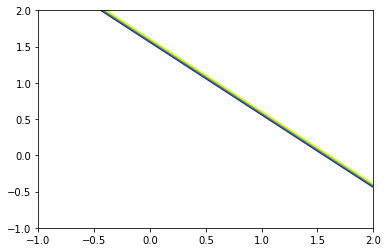

In [11]:
#plt.plot( Z, c='r')
plt.contour(x, y, Z)

In [12]:
digits = load_digits()

In [13]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [14]:
digits['target'].shape

(1797,)

In [15]:
digits['images'][74]

array([[ 0.,  0., 13., 13.,  8.,  2.,  0.,  0.],
       [ 0.,  5., 16., 16., 16., 12.,  0.,  0.],
       [ 0.,  1., 15., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 12., 13.,  7.,  1.,  0.,  0.],
       [ 0.,  0.,  8., 16., 16., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  9., 16.,  3.,  0.],
       [ 0.,  0.,  1.,  5., 14., 15.,  1.,  0.],
       [ 0.,  0., 10., 16., 16.,  6.,  0.,  0.]])

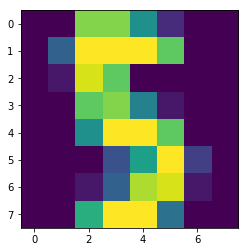

In [16]:
dig = digits['images'][74] #74
plt.imshow( dig )

In [17]:
img = np.zeros((dig.shape[0], dig.shape[1], 3))
img[:,:,0] = dig
img[:,:,1] = dig
img[:,:,2] = dig
np.max(img), img.shape

(16.0, (8, 8, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


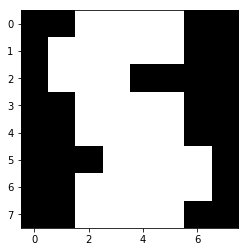

In [18]:
plt.imshow( img )

In [19]:
digits['target_names']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
clf.fit( digits['data'][:1400], digits['target'][:1400] )

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
pred = clf.predict( digits['data'][1400:] )

In [22]:
pred[232], digits['target'][1400:][232]

(3, 3)

In [23]:
sum( digits['target'][1400:] == pred )

378

In [24]:
pred.shape

(397,)

In [25]:
378/397

0.9521410579345088

In [26]:
def train( clf, data, labels ):
    n = data.shape[0]
    perm = np.random.permutation( n )
    tr_n = int(0.85 * n)
    train = perm[ :tr_n ]
    valid = perm[ tr_n: ]

    train_dig = data[ train ]
    train_lab = labels[ train ]

    valid_dig = data[ valid ]
    valid_lab = labels[ valid ]

    clf.fit( train_dig, train_lab )

    val_cnt = sum( clf.predict( valid_dig ) == valid_lab ) 
    return clf.predict( valid_dig ), valid_lab #val_cnt / valid_lab.shape[0]

In [27]:
ll = []
for k in range( 2000 ):
    clf = svm.SVC( kernel = 'poly' )
    tr, vl = train( clf, digits['data'], digits['target'] )
    eq = tr == vl
    ll.append( np.sum(eq)/eq.shape[0] )

In [28]:
ll

[0.9851851851851852,
 0.9925925925925926,
 0.9851851851851852,
 0.9851851851851852,
 0.9925925925925926,
 0.9925925925925926,
 0.9888888888888889,
 0.9888888888888889,
 0.9740740740740741,
 0.9814814814814815,
 0.9925925925925926,
 0.9888888888888889,
 0.9925925925925926,
 0.9777777777777777,
 0.9851851851851852,
 0.9925925925925926,
 0.9925925925925926,
 0.9888888888888889,
 0.9888888888888889,
 0.9814814814814815,
 0.9962962962962963,
 0.9814814814814815,
 0.9962962962962963,
 0.9888888888888889,
 0.9888888888888889,
 0.9814814814814815,
 0.9814814814814815,
 0.9925925925925926,
 0.9925925925925926,
 0.9925925925925926,
 0.9814814814814815,
 0.9925925925925926,
 0.9777777777777777,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9814814814814815,
 0.9814814814814815,
 0.9962962962962963,
 0.9962962962962963,
 0.9888888888888889,
 0.9814814814814815,
 0.9851851851851852,
 0.9851851851851852,
 0.9888888888888889,
 0.9851851851

In [29]:
np.mean(ll), np.std(ll)

(0.9881685185185185, 0.0060978191586077545)

In [30]:
params = sp.stats.t.fit( ll )
params

(87.43591832853579, 0.9881944573672035, 0.00602764768205021)

In [31]:
dat=sp.stats.norm.pdf( np.arange(0.965, 1, 0.001 ), loc = params[1], scale = params[2] )

In [32]:
np.arange(0.965, 1, 0.01)

array([0.965, 0.975, 0.985, 0.995])

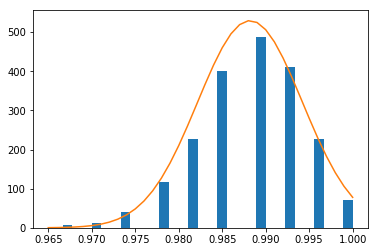

In [33]:
plt.hist( ll, 30 )
plt.plot( np.arange(0.965, 1, 0.001), dat*8 )

In [34]:
clf = svm.SVC( kernel = 'poly' )
pred, valid = train( clf, digits['data'], digits['target'] )

In [35]:
?metrics.classification_report

In [36]:
print( metrics.classification_report( [1,1,1,1,2,1], [1,2,1,1,2,2] ) )

             precision    recall  f1-score   support

          1       1.00      0.60      0.75         5
          2       0.33      1.00      0.50         1

avg / total       0.89      0.67      0.71         6



In [37]:
print( metrics.classification_report( [0,2,2], [1,2,1] ) )

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.00      0.00      0.00         0
          2       1.00      0.50      0.67         2

avg / total       0.67      0.33      0.44         3



/data/conda/anaconda3/envs/data_analysis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/data/conda/anaconda3/envs/data_analysis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [38]:
print( metrics.classification_report( pred, valid ) )

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        28
          1       1.00      0.96      0.98        25
          2       1.00      1.00      1.00        31
          3       1.00      0.97      0.98        33
          4       1.00      1.00      1.00        31
          5       1.00      0.96      0.98        23
          6       1.00      1.00      1.00        24
          7       1.00      1.00      1.00        29
          8       0.95      1.00      0.98        20
          9       0.93      1.00      0.96        26

avg / total       0.99      0.99      0.99       270



In [39]:
clf = linear_model.RidgeClassifier()
pred, valid = train( clf, digits['data'], digits['target'] )

In [40]:
qq = pred == valid
#q3q

In [41]:
sum(qq)/qq.shape[0]

0.9296296296296296

In [42]:
clf = svm.LinearSVC()
pred, valid = train( clf, digits['data'], digits['target'] )
qq = pred == valid
sum(qq)/qq.shape[0]

0.9407407407407408

In [43]:
clf.support_vectors_.shape

AttributeError: 'LinearSVC' object has no attribute 'support_vectors_'

In [44]:
clf = svm.SVC()
pred, valid = train( clf, digits['data'], digits['target'] )
qq = pred == valid
sum(qq)/qq.shape[0]

0.5481481481481482

In [45]:
clf = svm.SVC( gamma = 0.001 )
pred, valid = train( clf, digits['data'], digits['target'] )
qq = pred == valid
sum(qq)/qq.shape[0]

0.9740740740740741

In [46]:
clf = neural_network.MLPClassifier( )
pred, valid = train( clf, digits['data'], digits['target'] )
qq = pred == valid
sum(qq)/qq.shape[0]

0.9814814814814815

In [47]:
clf = linear_model.SGDClassifier()
pred, valid = train( clf, digits['data'], digits['target'] )
qq = pred == valid
sum(qq)/qq.shape[0]

/data/conda/anaconda3/envs/data_analysis/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9296296296296296